<a href="https://colab.research.google.com/github/nagabudibhavyanth/INFO5731/blob/main/NV_Bhavyanth_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
! pip install pandas

In [2]:
# Write your code here
import pandas as pd
reviews = pd.read_csv('/content/assignment4/reviews.csv')
print(reviews.shape)

(98, 4)


In [3]:
import nltk
reviews['Cleaned_Review'] = reviews['Cleaned_Review'].str.replace('[^\w\s]','')
reviews['Cleaned_Review'] = reviews['Cleaned_Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
reviews['Cleaned_Review'] = reviews['Cleaned_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
words = []
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(reviews['Cleaned_Review']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [5]:
import gensim
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)

In [6]:
model.print_topics(num_topics = 10, num_words = 5)

[(0,
  '0.013*"film" + 0.013*"review" + 0.011*"good" + 0.008*"joke" + 0.008*"act"'),
 (1,
  '0.035*"film" + 0.021*"movi" + 0.018*"joke" + 0.014*"phoenix" + 0.012*"like"'),
 (2,
  '0.028*"film" + 0.022*"peopl" + 0.020*"movi" + 0.013*"joke" + 0.010*"make"'),
 (3,
  '0.045*"movi" + 0.033*"joke" + 0.012*"one" + 0.010*"phoenix" + 0.010*"charact"'),
 (4,
  '0.024*"movi" + 0.022*"watch" + 0.019*"joke" + 0.013*"go" + 0.011*"perform"'),
 (5, '0.020*"movi" + 0.017*"part" + 0.014*"say" + 0.014*"feel" + 0.011*"ill"'),
 (6,
  '0.016*"cinematographi" + 0.011*"joaquin" + 0.011*"act" + 0.006*"phoenix" + 0.006*"perform"'),
 (7,
  '0.016*"like" + 0.015*"made" + 0.014*"film" + 0.013*"watch" + 0.009*"art"'),
 (8,
  '0.037*"movi" + 0.016*"joke" + 0.012*"make" + 0.012*"way" + 0.010*"think"'),
 (9,
  '0.033*"movi" + 0.019*"joke" + 0.012*"like" + 0.009*"get" + 0.009*"film"')]

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

**Term Frequency-Inverse Document Frequency (TF-IDF) :** TF-IDF measures the importance of a word in a document relative to a corpus. It emphasizes words that are frequent in a document but rare in the corpus, helping to identify distinctive words for sentiment classification. Words that are common across many documents may not carry much sentiment information and can be down-weighted.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf= TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tf_idf.fit(reviews['Cleaned_Review'])
x_values =  tf_idf.transform(reviews['Cleaned_Review'])
y_values = reviews['Sentimental Analysis']

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_values, y_values, test_size = 0.2)

In [8]:
from sklearn import metrics

def evaluate_metrics(y_pred, y_test):

    recall = metrics.recall_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro').round(3)
    precision = metrics.precision_score(y_pred = y_pred, y_true = y_test, pos_label='positive', average='micro').round(3)
    print("Accuracy: {} - Recall : {} - Precision : {} - F1 Score : {}".format(
        round(metrics.accuracy_score(y_pred, y_test), 3),
        recall,
        precision,
        2 * (precision * recall) / (precision + recall).round(3)
    ))

In [9]:
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score, KFold

naive_bayes_implement = naive_bayes.MultinomialNB()

naive_bayes_implement.fit(x_train,y_train)

y_pred_valid = naive_bayes_implement.predict(x_valid)

evaluate_metrics(y_pred_valid, y_valid)

print(f"Cross Validation Score: {cross_val_score(naive_bayes_implement, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22))}")

Accuracy: 0.65 - Recall : 0.65 - Precision : 0.65 - F1 Score : 0.65
Cross Validation Score: [0.5 0.5 1.  1.  1.  0.5 0.  0.5 0.5 0.5]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [10]:
from sklearn import svm

svm_implement = svm.SVC()

svm_implement.fit(x_train,y_train)

y_pred_valid = svm_implement.predict(x_valid)

evaluate_metrics(y_pred_valid, y_valid)

print(f"Cross Validation Score: {cross_val_score(svm_implement, x_valid, y_valid, cv= KFold(10, shuffle=True, random_state = 22)).mean().round(3)}")

Accuracy: 0.6 - Recall : 0.6 - Precision : 0.6 - F1 Score : 0.6
Cross Validation Score: 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [11]:
import pandas as pd

In [12]:
# Write your code here
df_test = pd.read_csv("/content/assignment4/test.csv")
df_train = pd.read_csv("/content/assignment4/train.csv")

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [17]:
df_train = df_train.select_dtypes(include=['number']).interpolate().dropna()
df_test = df_test.select_dtypes(include=['number']).interpolate().dropna()

In [18]:
import scipy.stats as sc
import matplotlib.pyplot as plt

In [19]:
correlation = {}

In [20]:
# The below features are been selected based on the correlation co-efficient of the feature with the target attribute SalePrice.
# Here, the columns with the correlation-coefficient > 0.5 are been selected because, the value that is greater than 0.5 will be nearer to the value 1.0 and shows the correlation with the target variable SalePrice
# The scatter plots also shows the same


0.790981600583805


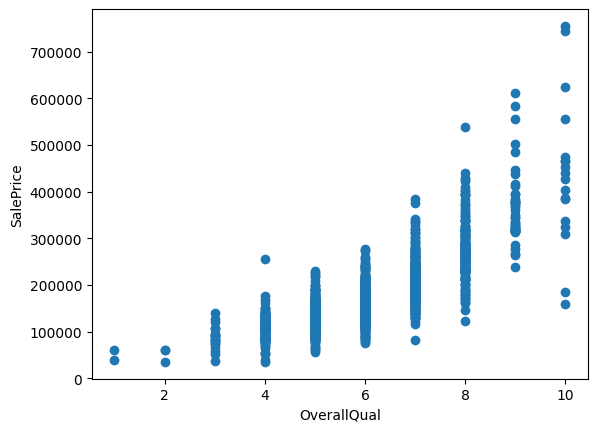

0.5228973328794969


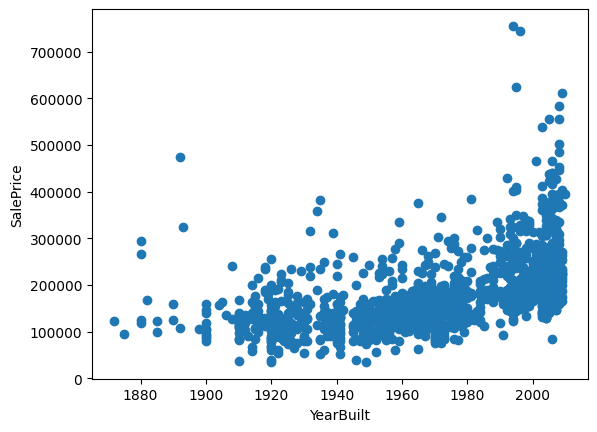

0.5071009671113861


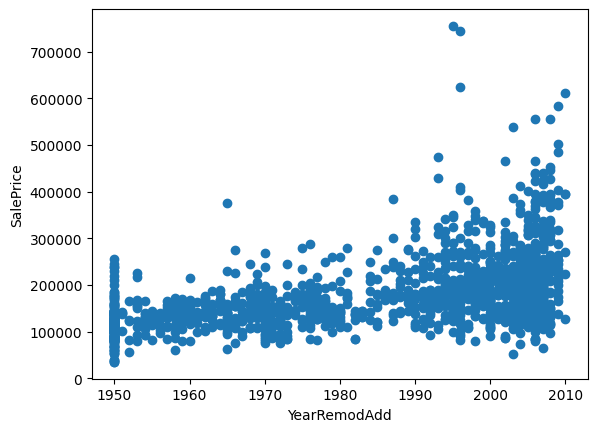

0.6135805515591953


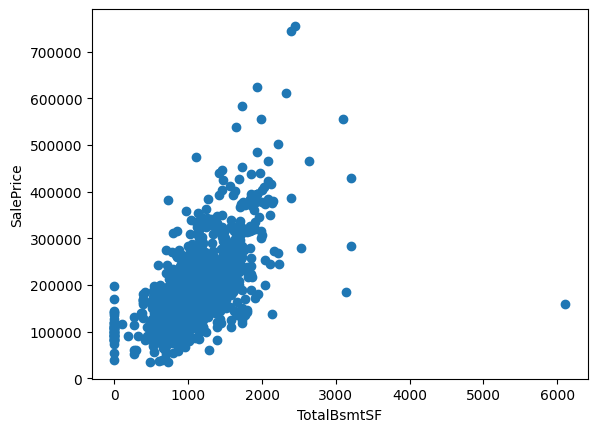

0.6058521846919146


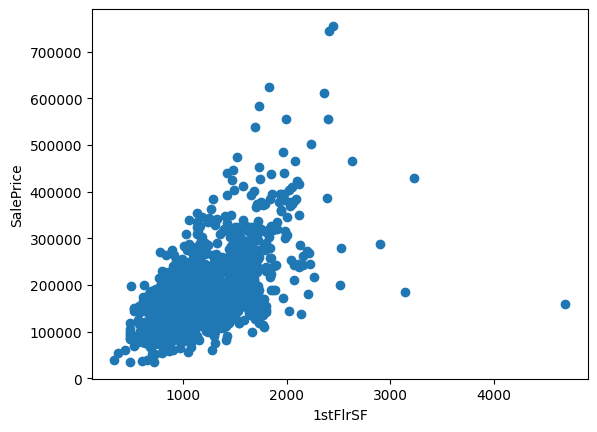

0.7086244776126522


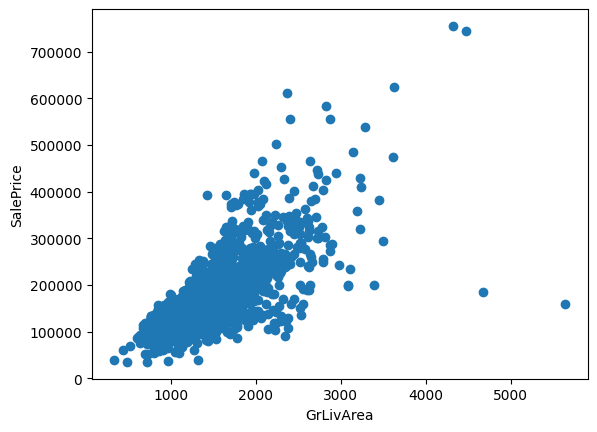

0.560663762748446


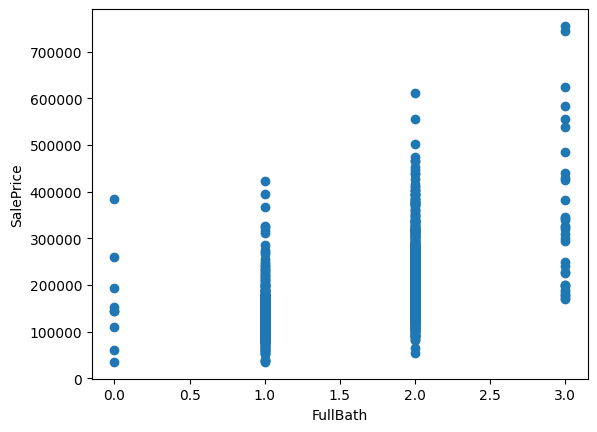

0.5337231555820281


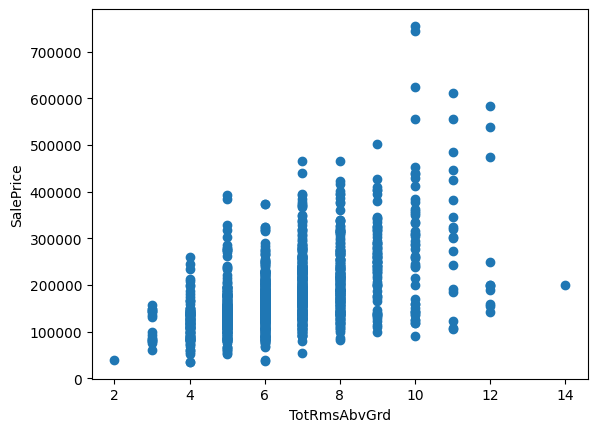

0.6404091972583521


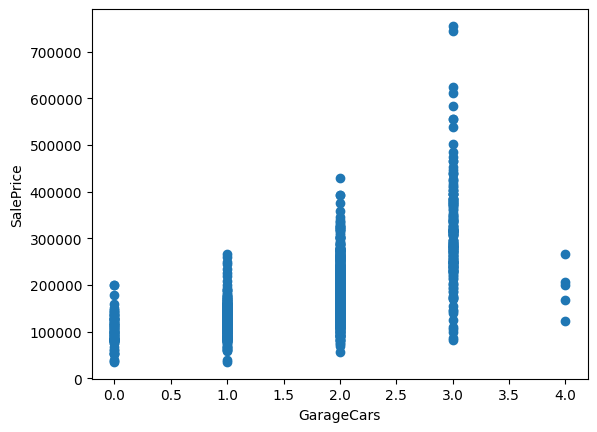

0.6234314389183618


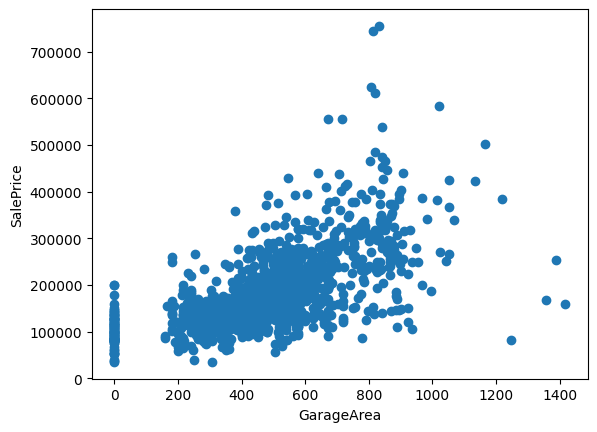

In [21]:
for col in df_train.columns[:-1]:
  co_eff, _ = sc.pearsonr(df_train["SalePrice"], df_train[col])
  if(co_eff > 0.5):
    correlation[col] = co_eff
    print(co_eff)
    plt.scatter(df_train[col], df_train["SalePrice"])
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.show()

In [22]:
correlation

{'OverallQual': 0.790981600583805,
 'YearBuilt': 0.5228973328794969,
 'YearRemodAdd': 0.5071009671113861,
 'TotalBsmtSF': 0.6135805515591953,
 '1stFlrSF': 0.6058521846919146,
 'GrLivArea': 0.7086244776126522,
 'FullBath': 0.560663762748446,
 'TotRmsAbvGrd': 0.5337231555820281,
 'GarageCars': 0.6404091972583521,
 'GarageArea': 0.6234314389183618}

In [23]:
test_data = df_test[correlation.keys()]

In [24]:
train_data = df_train[list(correlation.keys()) + ["SalePrice"]]

In [25]:
test_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0


In [26]:
train_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   TotalBsmtSF   1459 non-null   float64
 4   1stFlrSF      1459 non-null   int64  
 5   GrLivArea     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   GarageCars    1459 non-null   float64
 9   GarageArea    1459 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   1stFlrSF      1460 non-null   int64
 5   GrLivArea     1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   GarageArea    1460 non-null   int64
 10  SalePrice     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

regression = LinearRegression()
regression.fit(train_data[correlation.keys()], train_data["SalePrice"])

y_pred = regression.predict(test_data)

In [30]:
print('Linear Regression R squared": %.4f' % regression.score(train_data[correlation.keys()], train_data["SalePrice"]))

Linear Regression R squared": 0.7737


In [31]:
predicted_prices = pd.DataFrame({'Predicted Sale Price': y_pred})

In [32]:
display(predicted_prices)

,Predicted Sale Price
0,110135.921109
1,159059.960195
2,169683.677293
3,188059.736835
4,219781.967519
...,...
1454,72702.982138
1455,87428.982764
1456,156695.015844
1457,111786.599844


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [33]:
!pip install transformers torch

In [34]:
# Write your code here
import pandas as pd

file_path = '/content/assignment4/reviews.csv'
data = pd.read_csv(file_path)

data.head()

,Id,Review,Cleaned_Review,Sentimental Analysis
0,0,Creative actor Joaquin creativity embodied the...,creativ actor joaquin creativ embodi role joke...,Neutral
1,1,I sat through this slowwwwww movie and would g...,sat slowwwwww movi would gladli left half way ...,Negative
2,2,I was so looking forward to this film given al...,look forward film given hope brilliant act etc...,Negative
3,3,This is a stunning piece of work from JP and d...,stun piec work up director told phillip total ...,Positive
4,4,"Like the headline says, messed up, interesting...",like headlin say miss interest wonder phoenix ...,Negative


In [35]:
from transformers import pipeline
import numpy as np

plm = pipeline("zero-shot-classification", model="roberta-large-mnli")
sentiment_labels = ["Positive", "Neutral", "Negative"]

batch_classification = lambda x : plm(x, candidate_labels=sentiment_labels, hypothesis_template="The sentiment analysis of this review is {}.")

BATCH_SIZE = 10
results = []

for i in range(0, len(data), BATCH_SIZE):

    batch = data['Cleaned_Review'][i:i+BATCH_SIZE].tolist()
    batch_results = batch_classification(batch)
    labels = [result['labels'][0] for result in batch_results]
    results.extend(labels)
    print(f"Batch # { i // BATCH_SIZE + 1 } / { len(data) // BATCH_SIZE + 1 } is Processed")

data['Predicted_Sentiment'] = results

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializi

Batch # 1 / 10 is Processed
Batch # 2 / 10 is Processed
Batch # 3 / 10 is Processed
Batch # 4 / 10 is Processed
Batch # 5 / 10 is Processed
Batch # 6 / 10 is Processed
Batch # 7 / 10 is Processed
Batch # 8 / 10 is Processed
Batch # 9 / 10 is Processed
Batch # 10 / 10 is Processed


In [36]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(data['Sentimental Analysis'], data['Predicted_Sentiment'])
precision, recall, f1, _ = precision_recall_fscore_support(data['Sentimental Analysis'], data['Predicted_Sentiment'], average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Accuracy: 0.5408163265306123, Precision: 0.5566262511551265, Recall: 0.5408163265306123, F1 Score: 0.5442691362259189
